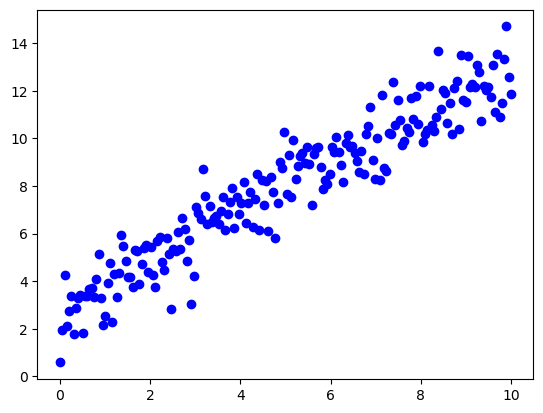

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# y = 1*x + 3
# y = a*x + b
# 0 < x < 10

#Al cambiar los valores cambia la inclinación
a=1
b=3
lx = np.linspace(0 , 10, 200)
ly = a*lx+b

ruido = np.random.randn(200)
ly = ly + ruido

plt.scatter(lx,ly,color="b")

In [61]:
# Ahora valores al azar
a=10
b=10

#Predicción de Y según la X
def prediceY_hat(x):
    return a*x + b

#Se pasan las X y las Y reales y devuelve un array de los errores de cada X
def error(x, y):
    return prediceY_hat(x) - y

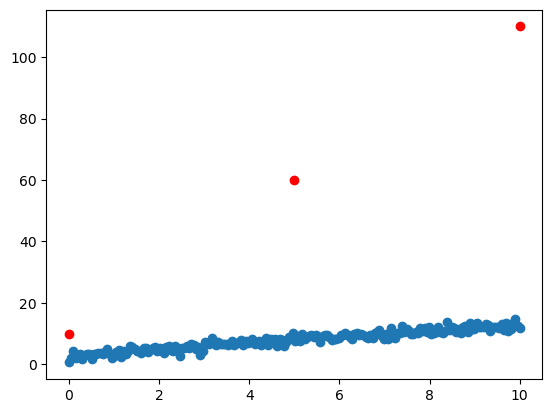

In [65]:
plt.scatter(lx,ly)
#Predijo tres valores con [0,5,10]
y_hat = prediceY_hat(np.array([0,5,10]))
plt.scatter([0,5,10],y_hat,color="r")